In [1]:
import pandas as pd
import numpy as np
import twosigmafunc

import matplotlib.pyplot as plt
import seaborn
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
train = pd.read_hdf('train.h5')

In [4]:
null_labels = [
 'technical_21',
 'technical_19',
 'technical_27',
 'technical_36',
 'technical_35',
 'technical_17',
 'technical_43',
 'technical_13',
 'fundamental_33',
 'technical_14',
 'technical_33',
 'fundamental_18',
 'fundamental_48',
 'fundamental_59',
 'technical_9',
 'technical_16',
 'technical_42',
 'technical_18',
 'fundamental_42',
 'fundamental_0',
 'fundamental_7',
 'fundamental_41',
 'technical_41',
 'fundamental_21',
 'fundamental_19',
 'technical_29',
 'technical_24',
 'derived_0',
 'derived_1',
 'fundamental_17',
 'technical_3',
 'fundamental_20',
 'fundamental_32',
 'fundamental_62',
 'fundamental_25',
 'technical_1',
 'fundamental_58',
 'derived_3',
 'technical_5',
 'fundamental_52',
 'technical_10',
 'technical_31',
 'technical_25',
 'technical_44',
 'technical_28',
 'fundamental_40',
 'fundamental_27',
 'fundamental_29',
 'fundamental_43',
 'fundamental_15',
 'fundamental_30',
 'fundamental_60',
 'fundamental_16',
 'fundamental_50',
 'fundamental_44',
 'fundamental_37',
 'fundamental_14',
 'fundamental_23',
 'fundamental_55',
 'fundamental_8',
 'fundamental_63',
 'fundamental_39',
 'fundamental_54',
 'derived_2',
 'derived_4',
 'fundamental_35',
 'fundamental_34',
 'fundamental_47',
 'fundamental_51',
 'fundamental_31',
 'fundamental_49',
 'fundamental_22',
 'fundamental_9',
 'fundamental_24',
 'fundamental_57',
 'fundamental_28',
 'fundamental_61',
 'fundamental_1',
 'fundamental_6',
 'fundamental_38',
 'fundamental_5']

In [5]:
excl = ['id', 'timestamp', 'y']
cols_origin = [col for col in train.columns if col not in ['y']]
feature_origin = [col for col in train.columns if col not in excl]
feature_diff = [col + '_diff' for col in feature_origin]


# Add differs 

In [6]:
# add time series diff
d_mean = train.median()
train.sort_values(['id', 'timestamp'], inplace=True)
train['id_diff'] = train.id.diff()
d_mean['id_diff'] = 0.0
for col in feature_origin:
    train[col + '_diff'] = train[col].diff()
    d_mean[col + '_diff'] = 0.0

train.loc[train.id_diff!=0, feature_diff] = 0


In [8]:
train.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_35_diff,technical_36_diff,technical_37_diff,technical_38_diff,technical_39_diff,technical_40_diff,technical_41_diff,technical_42_diff,technical_43_diff,technical_44_diff
131062,0,167,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131895,0,168,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
132728,0,169,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133561,0,170,-0.230583,0.488096,0.935920,0.028222,-0.083071,-0.240929,-0.007395,0.212425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134393,0,171,-0.230583,0.488096,0.935920,0.028222,-0.083071,-0.240929,-0.007395,0.212425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
train = train.fillna(d_mean)

# Add special features 

In [8]:
train['tec20-30'] = train.technical_20 - train.technical_30
train['tec123'] = train['tec20-30'] + train.technical_13
train['y_past'] = train.y.shift()
train['tec123_past'] = train.tec123.shift()
train.loc[train.id_diff != 0, ['y_past', 'tec123_past']] = 0
train.fillna(0, inplace=True)

In [9]:
train['y_past_p'] = twosigmafunc.predict_y_past(train[['tec123_past', 'tec123']])

In [10]:
train.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,fundamental_1_nan,fundamental_6_nan,fundamental_38_nan,fundamental_5_nan,nullcounts,tec20-30,tec123,y_past,tec123_past,y_past_p
131062,0,167,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,...,True,True,True,True,107,0.0,0.0,0.000000,0.0,-0.000266
131895,0,168,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,...,True,True,True,True,212,0.0,0.0,-0.007108,0.0,-0.000266
132728,0,169,-0.000837,0.005523,0.021095,0.002476,0.011752,-0.040645,-0.007395,-0.030291,...,True,True,True,True,212,0.0,0.0,0.001950,0.0,-0.000266
133561,0,170,-0.230583,0.488096,0.935920,0.028222,-0.083071,-0.240929,-0.007395,0.212425,...,True,False,False,False,125,0.0,0.0,0.017724,0.0,-0.000266
134393,0,171,-0.230583,0.488096,0.935920,0.028222,-0.083071,-0.240929,-0.007395,0.212425,...,True,False,False,False,38,0.0,0.0,0.012934,0.0,-0.000266


In [17]:
import json
try:
    with open('features.json', 'r') as js:
        features = json.load(js)
except IOError as err:
    raise err

In [18]:
etr_features = features['etr_features']

In [12]:
from sklearn.linear_model import Ridge
lr = Ridge(normalize=True)

In [19]:
X_train, y_train, X_test, y_test = twosigmafunc.split_data(train, etr_features)

In [14]:
low_y_cut = -0.075
high_y_cut = 0.075
y_is_above_cut = (y_train > high_y_cut)
y_is_below_cut = (y_train < low_y_cut)
y_is_within_cut = (~y_is_above_cut & ~y_is_below_cut)

In [23]:
linear_features = ['technical_20_diff', 'tec20-30']
lr.fit(X_train.loc[y_is_within_cut, linear_features], y_train[y_is_within_cut])
pred = lr.predict(X_test[linear_features]).clip(low_y_cut, high_y_cut)

In [24]:
twosigmafunc.R_score(pred, y_test)

0.026504556744822862

In [25]:
pred = lr.predict(X_train[linear_features]).clip(low_y_cut, high_y_cut)
X_train['residual'] = np.abs(pred - y_train)

In [26]:
X_train.head()

,y_past,tec20-30,technical_11_diff,tec123,technical_43,tec123_past,technical_30,technical_2,technical_43_diff,technical_11,...,technical_20_diff,fundamental_58,technical_22,technical_25_nan,technical_29_diff,fundamental_47_nan,technical_41_nan,technical_12,technical_20_diff,residual
131062,0.000000,0.0,0.0,0.0,-0.659754,0.0,0.0,-0.659754,0.0,-0.659749,...,0.0,-0.030392,-0.5,NaN,0.0,NaN,NaN,-0.000058,0.0,0.007202
131895,-0.007108,0.0,0.0,0.0,-0.659754,0.0,0.0,-0.659754,0.0,-0.659749,...,0.0,-0.030392,-0.5,NaN,0.0,NaN,NaN,-0.000058,0.0,0.001857
132728,0.001950,0.0,0.0,0.0,-0.659754,0.0,0.0,-0.659754,0.0,-0.659749,...,0.0,-0.030392,-0.5,NaN,0.0,NaN,NaN,-0.000058,0.0,0.017631
133561,0.017724,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.314097,-0.5,NaN,0.0,NaN,NaN,-1.000000,0.0,0.012841
134393,0.012934,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.314097,-0.5,NaN,0.0,NaN,NaN,-1.000000,0.0,0.025322


In [27]:
del train

# Residual group 

In [28]:
folds = 3
splits = [1 / folds * i for i in range(folds + 1)]

In [29]:
linear_models = []
for i in range(folds):
    low_r = X_train.residual.quantile(splits[i])
    high_r = X_trian.residual.quantile(splits[i + 1])
    x = X_train.loc[(X_train.residual > low_r) & (X_train.residual < high_r), linear_features + ['y']]
    clf = Ridge(x[linear_features], x.y)
    clf.fit(x[linear_features], x.y)
    X_trian[]
    linear_models.append(clf)

[0.0, 0.3333333333333333, 0.6666666666666666, 1.0]

In [18]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
etr = ExtraTreesRegressor(n_jobs=-1, n_estimators=60, random_state=17, verbose=0)
rfr = RandomForestRegressor(n_jobs=-1, random_state=17, verbose=0)
from scipy.stats import randint as sp_randint

In [19]:
param_dist = {
              "max_depth": [3,5, 10],
              "max_features": [0.3, 0.6, 0.9],
#                 "min_samples_leaf": [1, 10, 100],
#                 "n_estimators": [20]
#               "min_samples_split": sp_randint(1, 5),
#               "min_samples_leaf": sp_randint(1, 5)
             }

grid_search_etr = GridSearchCV(etr,
                           param_grid=param_dist,
                           cv=5)
grid_search_rfr = RandomizedSearchCV(rfr,
                           param_distributions=param_dist,
                           cv=5)

In [20]:
grid_search_etr.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid_search_etr.best_params

In [16]:
etr = ExtraTreesRegressor(n_jobs=-1,n_estimators=128, max_depth=5, max_features='sqrt', min_samples_leaf=10,
                          random_state=17, verbose=0)

In [17]:
etr.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=5,
          max_features='sqrt', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=10,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=128, n_jobs=-1, oob_score=False, random_state=17,
          verbose=0, warm_start=False)

In [18]:
imp = pd.DataFrame({'feature':feature_cols, 'important':etr.feature_importances_}).sort_values('important', ascending=False)

In [20]:
from twosigmafunc import R_score
y_etr = etr.predict(X_test)
R_score(y_etr, y_test)

0.017426062779552942

In [21]:
y_etr_t = etr.predict(X_train)
R_score(y_etr_t, y_train)

0.036813482498809912

strong overfit here, needs:
1. add more trees
2. reduce max_depth
3. reduce features

`max_depth` = 3

In [28]:
etr = ExtraTreesRegressor(n_jobs=-1,n_estimators=128, max_depth=3, max_features='sqrt', min_samples_leaf=10,
                          random_state=17, verbose=0)
etr.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=3,
          max_features='sqrt', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=10,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=128, n_jobs=-1, oob_score=False, random_state=17,
          verbose=0, warm_start=False)

In [30]:
imp = pd.DataFrame({'feature':feature_cols, 'important':etr.feature_importances_}).sort_values('important', ascending=False)

In [33]:
y_etr = etr.predict(X_test)
R_score(y_etr, y_test)

0.013063600794493386

nope, we shall set `max_depth` = 10

In [35]:
etr = ExtraTreesRegressor(n_jobs=-1,n_estimators=128, max_depth=10, max_features='sqrt', min_samples_leaf=10,
                          random_state=17, verbose=0)
etr.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=10,
          max_features='sqrt', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=10,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=128, n_jobs=-1, oob_score=False, random_state=17,
          verbose=0, warm_start=False)

In [36]:
y_etr = etr.predict(X_test)
R_score(y_etr, y_test)

0.023496240919556825

In [38]:
imp = pd.DataFrame({'feature':feature_cols, 'important':etr.feature_importances_}).sort_values('important', ascending=False)
imp[:10]

,feature,important
301,y_past,0.028259
93,technical_30,0.019654
300,tec123,0.018467
302,tec123_past,0.018313
299,tec20-30,0.017759
70,technical_2,0.015560
77,technical_11,0.013893
202,technical_30_diff,0.013294
85,technical_20,0.012659
106,technical_43,0.012044


In [39]:
y_etr_t = etr.predict(X_train)
R_score(y_etr_t, y_train)

0.080991721094345284

set `min_samples_leaf` = 50

In [40]:
etr = ExtraTreesRegressor(n_jobs=-1,n_estimators=128, max_depth=5, max_features='sqrt', min_samples_leaf=50,
                          random_state=17, verbose=0)
etr.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=5,
          max_features='sqrt', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=50,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=128, n_jobs=-1, oob_score=False, random_state=17,
          verbose=0, warm_start=False)

In [41]:
y_etr = etr.predict(X_test)
R_score(y_etr, y_test)

0.017651482292738052

add `max_features` to 0.5

In [42]:
etr = ExtraTreesRegressor(n_jobs=-1,n_estimators=128, max_depth=5, max_features=0.5, min_samples_leaf=10,
                          random_state=17, verbose=0)
etr.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=5,
          max_features=0.5, max_leaf_nodes=None, min_impurity_split=1e-07,
          min_samples_leaf=10, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=128, n_jobs=-1,
          oob_score=False, random_state=17, verbose=0, warm_start=False)

In [43]:
y_etr = etr.predict(X_test)
R_score(y_etr, y_test)

0.025439703873461724

In [44]:
y_etr_t = etr.predict(X_train)
R_score(y_etr_t, y_train)

0.057064044119817504

In [45]:
imp = pd.DataFrame({'feature':feature_cols, 'important':etr.feature_importances_}).sort_values('important', ascending=False)
imp[:10]

,feature,important
301,y_past,0.050888
299,tec20-30,0.044819
93,technical_30,0.044686
300,tec123,0.040665
302,tec123_past,0.033899
186,technical_11_diff,0.031841
77,technical_11,0.031784
106,technical_43,0.030474
15,fundamental_11,0.030417
215,technical_43_diff,0.029247


conlusion:
`max_depth`:4-7
`max_features`:0.5-1
`min_leaf`:11-40

In [46]:
etr = ExtraTreesRegressor(n_jobs=-1,n_estimators=128, max_depth=6, max_features=0.5, min_samples_leaf=10,
                          random_state=17, verbose=0)
etr.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=6,
          max_features=0.5, max_leaf_nodes=None, min_impurity_split=1e-07,
          min_samples_leaf=10, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=128, n_jobs=-1,
          oob_score=False, random_state=17, verbose=0, warm_start=False)

In [47]:
y_etr = etr.predict(X_test)
R_score(y_etr, y_test)

0.028108048001197376

In [48]:
y_etr_t = etr.predict(X_train)
R_score(y_etr_t, y_train)

0.069472023005379205

set `min_samples_leaf` = 30

In [49]:
etr = ExtraTreesRegressor(n_jobs=-1,n_estimators=128, max_depth=5, max_features=0.5, min_samples_leaf=30,
                          random_state=17, verbose=0)
etr.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=5,
          max_features=0.5, max_leaf_nodes=None, min_impurity_split=1e-07,
          min_samples_leaf=30, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=128, n_jobs=-1,
          oob_score=False, random_state=17, verbose=0, warm_start=False)

In [50]:
y_etr = etr.predict(X_test)
R_score(y_etr, y_test)

0.026180562830858595

In [51]:
y_etr_t = etr.predict(X_train)
R_score(y_etr_t, y_train)

0.057442264220322219

In [52]:
imp = pd.DataFrame({'feature':feature_cols, 'important':etr.feature_importances_}).sort_values('important', ascending=False)
imp[:10]

,feature,important
301,y_past,0.053863
299,tec20-30,0.042727
300,tec123,0.042613
93,technical_30,0.040247
186,technical_11_diff,0.036575
302,tec123_past,0.035329
77,technical_11,0.035016
106,technical_43,0.029057
85,technical_20,0.026772
215,technical_43_diff,0.026645


In [53]:
etr = ExtraTreesRegressor(n_jobs=-1,n_estimators=128, max_depth=6, max_features=0.5, min_samples_leaf=30,
                          random_state=17, verbose=0)
etr.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=6,
          max_features=0.5, max_leaf_nodes=None, min_impurity_split=1e-07,
          min_samples_leaf=30, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=128, n_jobs=-1,
          oob_score=False, random_state=17, verbose=0, warm_start=False)

In [54]:
y_etr = etr.predict(X_test)
R_score(y_etr, y_test)

0.029146165906949503

In [55]:
y_etr_t = etr.predict(X_train)
R_score(y_etr_t, y_train)

0.068558158687025014

In [56]:
imp = pd.DataFrame({'feature':feature_cols, 'important':etr.feature_importances_}).sort_values('important', ascending=False)
imp[:10]

,feature,important
301,y_past,0.048297
299,tec20-30,0.040721
93,technical_30,0.037553
300,tec123,0.037264
106,technical_43,0.033812
215,technical_43_diff,0.033129
302,tec123_past,0.029382
186,technical_11_diff,0.025346
179,technical_2_diff,0.025297
77,technical_11,0.024707


stick parameters here, we reduce features to 100, see what happens

In [63]:
feature_100 = imp.loc[imp.important > imp.important.mean() / 2, 'feature']

In [66]:
etr = ExtraTreesRegressor(n_jobs=-1,n_estimators=128, max_depth=6, max_features=0.5, min_samples_leaf=30,
                          random_state=17, verbose=0)
etr.fit(X_train[feature_100], y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=6,
          max_features=0.5, max_leaf_nodes=None, min_impurity_split=1e-07,
          min_samples_leaf=30, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=128, n_jobs=-1,
          oob_score=False, random_state=17, verbose=0, warm_start=False)

In [68]:
y_etr = etr.predict(X_test[feature_100])
R_score(y_etr, y_test)

0.028795669708638838

almost as good as 300+ features

In [69]:
y_etr_t = etr.predict(X_train[feature_100])
R_score(y_etr_t, y_train)

0.068178389469970527

## set 256 trees 

In [92]:
etr = ExtraTreesRegressor(n_jobs=-1,n_estimators=256, max_depth=6, max_features=0.5, min_samples_leaf=30,
                          random_state=17, verbose=0)
etr.fit(X_train[feature_100], y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=6,
          max_features=0.5, max_leaf_nodes=None, min_impurity_split=1e-07,
          min_samples_leaf=30, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=256, n_jobs=-1,
          oob_score=False, random_state=17, verbose=0, warm_start=False)

# Let's plot the accumulated y

In [93]:
low_y_cut = -0.075
high_y_cut = 0.075
reward = []
stamp = 906
y_true_acc = []
y_pred_acc = []
print('without clip')
while stamp <= train.timestamp.max():
    x = train.loc[train.timestamp == stamp, feature_100]
    y_pred = etr.predict(x)
    y_true = train.loc[train.timestamp == stamp, 'y']
    y_pred_acc.extend(list(y_pred))
    y_true_acc.extend(list(y_true))
    score = twosigmafunc.R_score(np.array(y_pred_acc), np.array(y_true_acc))
    reward.append(score)
    stamp += 1
    if stamp % 100 == 0:
        print(stamp, score)

without clip
1000 0.0114897040457
1100 -0.00676789484353
1200 0.0131572869728
1300 0.0130994377995
1400 -0.0141501658827
1500 0.0133605055644
1600 0.0312843211064
1700 0.0315856902462
1800 0.0295618129653


In [77]:
ridge_data = pd.read_csv('Linear_R_score.csv')

In [79]:
ridge_data.head()

,Unnamed: 0,Bi_Ridge,LR,Mixed_model,Ridge,timestamp
0,0,-0.199228,-0.186395,-0.189450,-0.189450,906
1,1,-0.130472,-0.123510,-0.125910,-0.125910,907
2,2,-0.062324,-0.075748,-0.067650,-0.067650,908
3,3,-0.017021,-0.045951,-0.034686,-0.034686,909
4,4,-0.027521,-0.046525,-0.036888,-0.036888,910


(-0.1, 0.034)

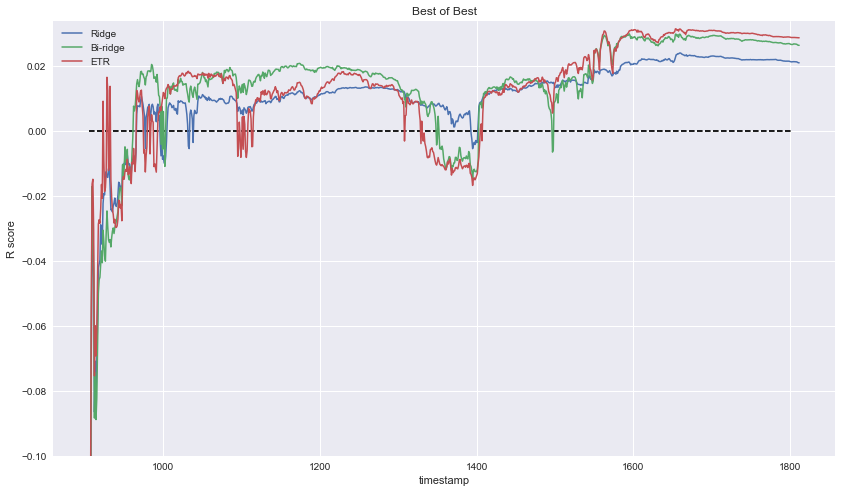

In [89]:
plt.title('Best of Best')
plt.xlabel('timestamp')
plt.ylabel('R score')
plt.plot([905, 1801], [0, 0], 'k--')
plt.plot(ridge_data.timestamp, ridge_data.Ridge, lw=1.5, label='Ridge')
plt.plot(ridge_data.timestamp, ridge_data.Bi_Ridge, lw=1.5, label='Bi-ridge')
# plt.plot(ridge_data.timestamp, ridge_data.Mixed_model, lw=1.5, label='Mixed-Ridge')
plt.plot(ridge_data.timestamp, reward,lw=1.5, label='ETR')
plt.legend(loc='best')
plt.ylim(-0.1, 0.034)

(-0.1, 0.034)

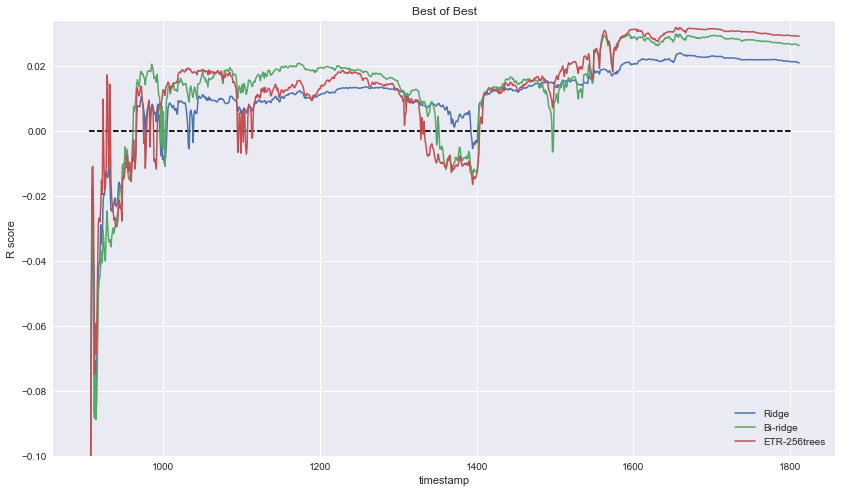

In [94]:
plt.title('Best of Best')
plt.xlabel('timestamp')
plt.ylabel('R score')
plt.plot([905, 1801], [0, 0], 'k--')
plt.plot(ridge_data.timestamp, ridge_data.Ridge, lw=1.5, label='Ridge')
plt.plot(ridge_data.timestamp, ridge_data.Bi_Ridge, lw=1.5, label='Bi-ridge')
# plt.plot(ridge_data.timestamp, ridge_data.Mixed_model, lw=1.5, label='Mixed-Ridge')
plt.plot(ridge_data.timestamp, reward,lw=1.5, label='ETR-256trees')
plt.legend(loc='best')
plt.ylim(-0.1, 0.034)

seems not better than 128 trees, we could save time for xgb?

### how we combine it with ridge?

In [95]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge2 = Ridge()

In [98]:
y_is_above_cut = (y_train > high_y_cut)
y_is_below_cut = (y_train < low_y_cut)
y_is_within_cut = (~y_is_above_cut & ~y_is_below_cut)
ridge.fit(np.array(X_train.loc[y_is_within_cut, 'technical_20_diff']).reshape(-1,1), y_train.loc[y_is_within_cut])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [99]:
y_lr_1 = ridge.predict(np.array(X_test['technical_20_diff']).reshape(-1, 1))
twosigmafunc.R_score(y_lr_1, y_test)

0.021085779479170109

In [100]:
ridge2.fit(X_train.loc[y_is_within_cut, ['technical_20_diff', 'tec20-30']], y_train[y_is_within_cut])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [103]:
y_lr_2 = ridge2.predict(X_test[['technical_20_diff', 'tec20-30']])
twosigmafunc.R_score(y_lr_2, y_test)

0.02648156394967555

In [105]:
y_etr = etr.predict(X_test[feature_100])

In [106]:
R_score(y_etr, y_test)

0.029310961622725951

In [109]:
for a in np.linspace(0, 1, 9):
    y = y_lr_2 * a + y_etr * (1 - a)
    print(a, R_score(y, y_test))

0.0 0.0293109616227
0.125 0.0294862292046
0.25 0.0295154327325
0.375 0.0293990074883
0.5 0.0291352077122
0.625 0.0287199726809
0.75 0.0281466010093
0.875 0.0274051688772
1.0 0.0264815639497


In [130]:
for a in np.linspace(0.15, 0.25, 9):
    y = y_lr_2 * a + y_etr * (1 - a)
    print('a={a:.4f}, score {b:.7f}'.format(a=a, b=R_score(y, y_test)))

a=0.1500, score 0.0295037
a=0.1625, score 0.0295103
a=0.1750, score 0.0295154
a=0.1875, score 0.0295190
a=0.2000, score 0.0295212
a=0.2125, score 0.0295219
a=0.2250, score 0.0295212
a=0.2375, score 0.0295191
a=0.2500, score 0.0295154


In [131]:
a = 0.2125
y_1 = y_lr_2 * a + y_etr * (1 - a)

In [133]:
for a in np.linspace(0, 0.2, 9):
    y = y_1 * (1-a) + y_lr_1 * a
    print('a={a:.4f}, score {b:.7f}'.format(a=a, b=R_score(y, y_test)))

a=0.0000, score 0.0295219
a=0.0250, score 0.0294829
a=0.0500, score 0.0294365
a=0.0750, score 0.0293828
a=0.1000, score 0.0293216
a=0.1250, score 0.0292530
a=0.1500, score 0.0291769
a=0.1750, score 0.0290931
a=0.2000, score 0.0290018


In [91]:
list(feature_100)

['y_past',
 'tec20-30',
 'technical_30',
 'tec123',
 'technical_43',
 'technical_43_diff',
 'tec123_past',
 'technical_11_diff',
 'technical_2_diff',
 'technical_11',
 'technical_20',
 'technical_2',
 'fundamental_25_nan',
 'technical_14_diff',
 'technical_21_diff',
 'technical_9_nan',
 'technical_40',
 'technical_30_diff',
 'technical_6_diff',
 'technical_6',
 'technical_17_diff',
 'technical_17',
 'technical_14',
 'technical_7',
 'technical_19',
 'technical_44_nan',
 'fundamental_27_nan',
 'technical_18_nan',
 'technical_28_nan',
 'technical_21',
 'technical_42_nan',
 'technical_29_diff',
 'technical_20_diff',
 'technical_31_nan',
 'fundamental_53',
 'technical_24_nan',
 'technical_36',
 'technical_19_diff',
 'technical_27',
 'technical_29',
 'technical_35',
 'technical_22',
 'technical_41_nan',
 'fundamental_8',
 'fundamental_21',
 'fundamental_17_nan',
 'technical_34',
 'technical_16_nan',
 'technical_27_diff',
 'fundamental_33_nan',
 'fundamental_58',
 'derived_1_nan',
 'technical